# Reconstructing a Helix in 3D

In [8]:
using Revise, TaD, Plots, LinearAlgebra

## N=100 Steps

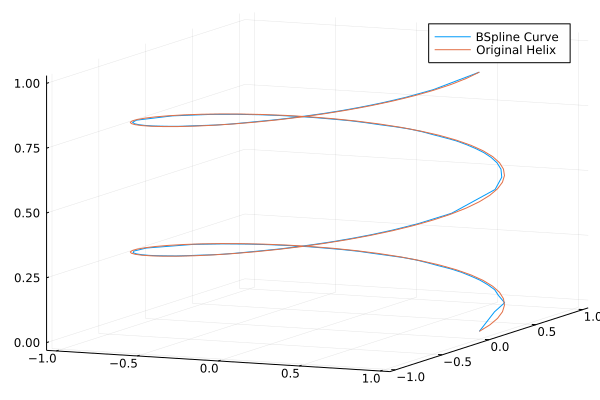

In [2]:
n = 100
helix = construct_helix(n)
Curve = reconstruct_trajectory(helix)
plot(Curve, label="BSpline Curve")
plot!(tuple(eachcol(helix)...), label="Original Helix")

## N=1000 Steps

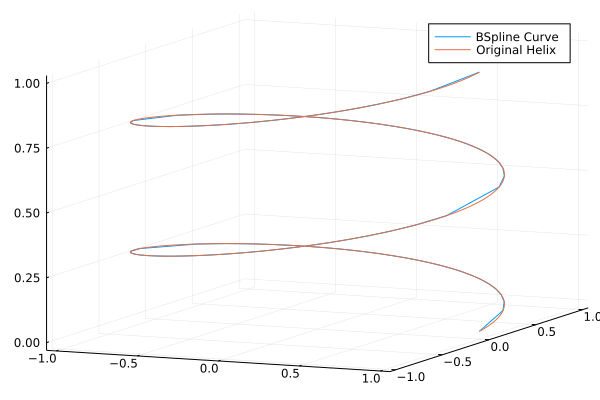

In [9]:
n = 10000
helix = construct_helix(n)
Curve = reconstruct_trajectory(helix)
plot(Curve, label="BSpline Curve")
plot!(tuple(eachcol(helix)...), label="Original Helix")

## Error Analysis

### Error Analysis using 'Norm' from LinearAlgebra.jl

In [3]:
resolutions = 100:100:5000
scaled_norm = zeros(length(collect(resolutions)))
for (i, resolution) in enumerate(resolutions)
    helix = construct_helix(resolution)
    Curve = reconstruct_trajectory(helix)
    evals = evaluate(Curve, length(helix[:,1]))
    scaled_norm[i] = norm(helix-evals)/resolution
end

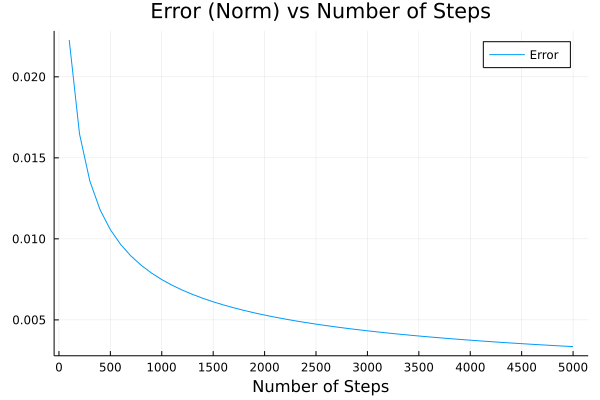

In [4]:
plot(resolutions, scaled_norm, label="Error", title="Error (Norm) vs Number of Steps", xlabel="Number of Steps", xticks=0:500:5000)

### Error Analysis using L2 Norm

In [12]:
#The cumulative sum of the error in each dimension
resolutions = 100:100:5000
scaled_L2 = zeros(length(collect(resolutions)))
for (i, resolution) in enumerate(resolutions)
    helix = construct_helix(resolution)
    Curve = reconstruct_trajectory(helix)
    evals = evaluate(Curve, length(helix[:,1]))
    error = cumsum(L2error(Curve, helix))[end];
    scaled_L2[i] = error
end

0.00.029659991007029160.043976383118331240.055053444746515790.064509910832390760.072996621642723610.080838129798766630.08822621814397930.095286328397783750.102108128771057250.108760783933203880.115299996567432670.121773752390121570.12822624760987840.13470000343256730.141239216066796120.147891871228942760.15471367160221620.161773781856020620.169161870201233360.17700337835727640.185490089167609170.194946555253484230.20602361688166880.22054457678993640.249999999999999940.279455423210063670.29397638311833130.30505344474651590.31450991083239070.32299662164272370.330838129798766640.338226218143979350.345286328397783840.35210812877105730.358760783933203930.36529999656743270.371773752390121670.37822624760987850.38470000343256750.39123921606679630.397891871228942930.40471367160221640.411773781856020760.419161870201233470.42700337835727650.43549008916760940.44494655525348420.456023616881668870.47054457678993650.50000000000000020.52945542321006360.54397638311833120.55505344474651570.5645099108323

0.88244897420240260.88458644202964320.88673088576673250.88888394633014130.89104732787808920.89322280536069580.89541223613506890.8976175883915050.89984094837205380.90208454166478270.90435077279582870.90664223942177950.90896176594731860.91131246473290150.91369777142447880.91612149943078720.91858793547212360.92110193481656380.92366902882474340.92629558101901640.92898900810966740.93175805216809460.93461313939177150.93756689346626780.94063486722062480.94383661578259960.9471973279783380.95075042016983190.95454190261160890.95863828150459410.96314219893195260.96822739868499640.97423766216857240.98208228876444131.00.00.0156161690811863430.0223578688444655730.0275251116228391430.0318930172682955550.035756117697873170.0392641025666156940.0425053495112721960.0455372362603441440.048399444741291830.051120815036576210.0537230820198127960.056223107200871810.0586342861111009560.060967473519129070.063231613920836230.065434184578297720.067581515078825860.069679022711604480.07173138663951270.0737426846832

0.27462521710670950.278512932526821130.281948585106694850.285065552253604640.287942613070443330.29063099892145280.29316614301354770.2955738085355480.297873415528245140.30008002609816170.30220560241636320.304259835255801470.306250706481277330.308184883925357530.31006800656135740.3119048949454950.313699709243917050.315456069995509850.3171771523953920.31886576050674420.32052438641282290.32215525786942460.323760376963696140.325341550340228440.326900415887375560.32843846621497950.32995706712631950.33145747230076910.332940834770851850.33440822085481320.3358606203739460.33729895354247790.338724077183608030.3401367938584930.34153785720142610.34292797439120540.344307812329645860.345678002612107460.3470391428203240.348391800010686650.349736515293577350.351073804563739930.35240416058879150.35372805689704620.35504594809734590.356358271459603250.3576654500149360.35896789254063660.360265995120265140.361560143422933240.36285071252472160.36413806861486580.365422570458158240.36670456933380110.367984410

0.337543883172440330.33873035260747180.339908212403838450.341077900246229360.34223983109547420.343394400297185650.344541985047756960.34568294474174640.346817623347231930.347946350892454850.349069443484164240.35018720499413380.35129992847540410.352407896030680350.35351138010322580.354610644693933940.355705945147981650.3567975292803240.357885638312831040.35897050664177150.36005236291391720.361131430645826150.36220792806440050.36328206913710380.364354063884799460.365424118404674370.36649243576569880.36755921610479130.368624656886364030.369688953560010750.37075229959906150.371814886934068670.37287690635065520.373938547628863750.3750.376061452371136250.37712309364934480.37818511306593150.379247700400938360.380311046439989360.381375343113635970.38244078389520870.38350756423430120.384575881595325460.38564593611520040.38671793086289620.387792071935599450.388868569354173850.389947637086082770.39102949335822840.392114361687169070.393202470719676070.39429405485201840.395389355306065950.3964886198

0.193725274778404650.195140289981616920.19658651419156150.198066620440924520.199583659436531920.201141138999483470.20274312624021170.204394380843516630.20610053314157530.20786832669989020.209705951228932540.211623512333354020.213633731870848220.215753016380102220.218003105648943730.220413937472697890.22302868129876640.225913760926711450.229181387528073740.233051603778381740.238098543217972030.249999999999997920.261901456782027640.26694839622161790.270818612471926070.27408623907328840.276971318701233370.2795860625273020.28199689435105610.284246983619897640.286366268129151670.28837648766664580.290294048771067350.29213167330010970.293899466858424550.29560561915648330.29725687375978820.29885886100051650.3004163405634680.301933379559075450.30341348580843840.304859710018382970.30627472522159530.307660889342809660.30902029506423520.31035481000391370.311666109413239970.31295570303003430.314224957314994060.31547511390267310.31670730507264520.31792256707475110.319121851388054160.3203060343411955

0.052499032682182740.053784355058034020.055044290835055960.056280585789297480.05749480548637090.058688360392157420.0598625266554959350.061018463449191060.062157227547929760.063279785660829040.064387024928669610.065479761909011610.066558750306808580.067624687657555670.06867822112884420.069719952457627230.0707504422934920.071770214274783580.072779758489428040.073779534519512430.07476997408560.07575148316638310.076724444380379060.077689219045500340.078646148898493430.07959555741379920.080537751102865080.081473021139288060.082401644526776560.083323884900058070.084239993331535960.085150209593098820.086054762950668810.086953872537010270.087847748106935760.088736590960080260.089620594358632040.09049994371759690.091374817484247570.092245387629992430.093111819687148160.093974273311252850.094832902868039150.095687857464551230.096539281226487760.097387313912163780.098232090962025580.099073743607198380.099912399450139620.1007481825204950.10158121330529940.102411609273298050.103239484915654350.1040

0.70015584646658050.7015301081442470.7029392715020820.70438661819891120.70587595358497670.70741173129808340.7089992183175180.71064472363456680.7123559103596930.71414223074716120.71601559191692770.71799132840854520.72008979047286380.72233895473101120.72477918368688850.72747256589433210.73052392109160110.73413865992748770.73885214792031060.75000000000000420.76114785207969070.76586134007251350.76947607890839960.77252743410566860.7752208163131120.77766104526898960.77991020952713660.78200867159145530.78398440808307270.78585776925283920.78764408964030750.78935527636543370.79100078168248280.79258826870191690.79412404641502380.7956133818010890.79706072849791830.79846989185575350.79984415353342010.80118636714949290.80249903268218280.8037843550580340.80504429083505620.80628058578929780.80749480548637120.80868836039215770.80986252665549620.81101846344919150.812157227547930.81327978566082910.81438702492866970.8154797619090120.81655875030680870.81762468765755580.81867822112884440.81971995245762730.

0.3781844659016360.37889263848942280.37960111973974010.38030996630406770.3810192350871720.38172898328601560.382439268472571040.383150148581155760.38386168198429080.384573927557467670.385286944658320360.386000793244717530.38671553390115170.387431227833260670.388147937019478530.388865724191746250.38958465286750810.39030478751468930.391026193495590150.39174893714953480.39247308594946780.39319870842725480.39392587430878060.39465465465032970.3953851217610540.396117349386289950.3968514128231620.39758738884977610.398325355949596670.39906539441630060.399807586292160340.400552015624984660.401298768581904330.402047933393579860.402799600632711140.403553863366223950.404310817099584330.40507056005929390.40583319342270570.406598821261003660.407367550798334750.40813949275961840.408914761328334430.409693474355673550.41047575382657860.41126172590175230.41205152107187270.412845274641517550.413643127015573760.41444522380254510.41525171620419340.416062761616045830.416878523795940650.417699173197241150.418

0.036593908382355450.038003390034654890.039366198469784880.040687047019105650.0419699220411160550.0432182299237418160.044434906953954760.0456225067045101450.046783266510950220.0479191594934185450.049031936200085740.0501231582114049150.0511942255937927960.0522463994486883350.053280820498511680.0542985246035208040.0553004558068820940.056287477370181340.0572603811639776850.058219895702987660.059166693057457880.060101394827104950.061024577328594080.061936776118106330.062838489931552620.063730184162667740.064612293946366240.065485226879892540.066349365439522450.067205069133479340.068052676425248330.068892506450424650.069724860490041380.070550023382758680.071368264837177270.072179840572155530.072984993348831480.073783953867144150.07457694152288520.075364165298249080.076145824502531960.076922109420132650.077693201815983120.078459275438122480.079220496658459050.079977024946855250.080729013238462650.081476608211378610.082219950808589490.082959176608874990.083694416064795480.084425794687170280.0

0.58659795458074690.58731505827151180.58802886547712510.58873947796674130.58944699412816310.59015150927659180.59085311586711350.59155190350635270.5922479591000440.59294136711967520.5936322096456490.59432056638991830.59500651496695050.59569013096984470.59637148793237580.5970506575648180.59772770985468760.59840271300804050.59907573364031520.59974683689038830.60041608635570030.60108354424916410.60174927151321460.60241332775338640.60307577137625410.60373665969240050.60439604885047630.60505399396824280.60571054921607880.60636576775464570.6070197018659060.60767240301110980.60832392177802660.60897430801260670.60962361084795680.61027187867020340.61091915924466940.61156549971693740.6122109466061480.61285554591536660.6134993431117570.61414238315078970.61478471056140630.61542636941683430.61606740338563370.61670785578661170.61734776956412910.61798718735446530.61862615151186310.61926470410112060.61990288696288150.62054074171995870.62117830979291990.62181563244992090.62245275080839220.62308970586720

0.122973952442347530.123552899759955720.12413177048377260.124710595264923850.125289404735076160.125868229516227480.126447100240044320.127026047557652460.127605102158054320.128184294783126460.128763656235050040.129343217403811630.129923009271731670.130503062927636860.1310834095967410.131664080635544580.132245107559585160.132826522065857660.133408356024783880.133990641523294850.134573410871755030.13515669660239530.135740531523537130.136324948708229230.136909981508494870.137495663610777030.1380820290108830.138669112049439270.139256947457770040.139845570327848060.140435016169518920.141025320939630130.14161652101531320.14220865327049030.142801755085397750.143395864329550650.143991019453332230.144587259479032230.145184623997014820.145783153268138070.146382888200181970.146983870357682960.147586142072480410.148189746410621630.148794727193545860.149401129116617570.150008997711679530.15061837937508470.15122932149647620.15184187242231630.152456081484785340.153071999143656770.15368967695810360.154

0.62876365623505020.62934321740381170.62992300927173160.63050306292763690.63108340959674090.63166408063554470.63224510755958520.63282652206585770.63340835602478380.6339906415232950.6345734108717550.63515669660239530.63574053152353720.63632494870822920.63690998150849490.6374956636107770.63808202901088310.63866911204943920.639256947457770.63984557032784830.64043501616951890.64102532093963040.64161652101531330.64220865327049040.64280175508539780.64339586432955060.64399101945333230.64458725947903220.64518462399701480.64578315326813810.6463828882001820.64698387035768290.64758614207248030.64818974641062150.64879472719354590.64940112911661760.65000899771167960.65061837937508470.65122932149647630.65184187242231630.65245608148478540.65307199914365690.65368967695810360.65430916760971920.65493052505737780.6555538045299570.65617906253686530.65680635702842530.65743574743046050.65806729463774740.6587010611626640.65933711123814080.65997551079654070.66061632758529840.66125963135036660.6619054938238486

0.129777954878189080.130309588324469370.130841459211891140.13137359164739630.131906009853196420.132438738163215940.132971801033718580.1335052230689980.13403902901081480.134573243760928750.135107892399349120.135643000172434770.136178592527625870.136714695119075860.137251333800886060.137788534670995360.138326324062505580.138864728547917680.139403774986178560.139943490502193260.140483902505838140.141025038735081040.141566927229246160.142109596363368760.14265307488258040.143197391874350240.143742576816986770.144288659603209770.144835670515140930.14538364028489230.145932600107687660.14648258162158380.14703361697794920.14758573884638960.14813898039937570.148693375390800880.149248958156337540.14980576360155710.150363827287234960.150923185429929970.151483874890996520.152045933267235920.152609398897982560.153174310851769360.15374070901967340.154308634137383080.15487812776645660.155449232385015760.156021991435673720.156596449299991780.157172651377903320.15775064417232120.15833047526013990.158912

0.60843307277075390.6089749612649190.60951609749416190.61005650949780670.61059622501382150.61113527145208250.61167367593749440.61221146532900460.61274866619911380.61328530488092410.61382140747237410.61435699982756520.61489210760065090.61542675623907130.61596097098918520.61649477693100190.61702819896628160.61756126183678410.61809399014680360.61862640835260370.61915854078810880.61969041167553060.62022204512181110.62075346514455440.62128469567450880.62181576056152140.62234668359447580.62287748850188440.62340819896470920.623938838628580.62446943110790120.6250.6255305688920990.62606116137142010.62659180103529070.62712251149811570.62765331640552440.62818423943847860.6287153043254910.62924653485544570.6297779548781890.63030958832446940.6308414592118910.63137359164739630.63190600985319640.6324387381632160.63297180103371850.63350522306899790.63403902901081490.63457324376092870.63510789239934920.63564300017243480.6361785925276260.63671469511907590.6372513338008860.63778853467099540.6383263240625

0.088195264702465030.088741573230383180.089286050036017640.089828738681203970.090369681651893440.090908920433511970.091446495579834490.091982446707731270.092516812522273280.093049630902578780.093580938912457250.094110772790650780.094639168036109850.095166159433292420.095691781027814980.09621606619750170.096739047689717030.097260757593995980.097781227395447350.09830048802021570.098818569808975660.099335502556191960.099851315559143760.100366037592887830.100879696940551780.101392321442218990.101903938470678290.102414574957569460.102924257439407740.10343301203322610.103940864462454530.104447840097984660.104953963933232540.10545926061255020.105963754465531950.106467469481838260.106970429343727930.107472657452004170.107974176901983350.108475010520308240.108975180881257420.109474710286354440.109973620803947790.110471934275254330.110969672301025210.111466856280531270.111963507408224170.112459646670332830.11295529487920160.11345047266315050.113945200473924480.114439498613096690.1149333872188947

0.47494514288440340.47657820147119820.478330183482673870.48023270292813620.48233435703244780.48471710117194890.48754121484354970.491222915101469540.4999999999999940.50877708489852960.51245878515644940.51528289882805090.51766564296755190.51976729707186340.52166981651732570.52342179852880170.52505485711559630.52659092850078660.52804596814306040.5294320106912250.53075839912535440.53203255882601970.533260504803170.53444719286096690.53559676189015930.53671271097331750.53779802987696450.53885529743208350.53988675525504370.54089436809985710.54187986816380170.54284479206108870.54379051091038650.54471825403491480.54562912839438350.54652413514801520.54740418338926570.54827010154045840.54912264701469880.54996251445166120.55079034277178820.55160672124373070.55241219473894170.55320726829162250.5539924110669790.5547680598367260.55553462203451720.55629247845149240.55704198562230030.55778347794389160.55851726956276850.55924365606087290.55996291596553480.56067531210223950.56138109281466730.562080493068

0.91512363322638980.91568407996391670.91624674989617660.91681169814154370.91737898143035910.91794865817339140.91852078849305120.91909543430679320.91967265946759650.92025252983221870.92083511332231140.92142048002903070.92200870237201040.9225998551987370.92319401587106540.92379126439439290.92439168358851080.9249953592553610.92560238029150740.92621283885213270.92682683053459250.92744445461163520.92806581422645840.92869101658601690.92932017319908920.92995340013362530.93059081831635430.93123255384016120.93187873825480230.93252950891202280.9331850093419010.93384538966083050.93451080702097690.93518142610701150.93585741963925230.93653896893901680.93722626455220330.93791950693167480.93861890718533260.93932468789776050.94003708403446480.94075634393912710.94148273043723150.94221652205610820.94295801437769990.94370752154850730.94446537796548290.94523194016327390.94600758893302080.94679273170837740.9475878052610580.9483932787562690.94920965722821160.95003748554833890.95087735298530140.9517298984595

0.348115474572525450.348596971268641530.34907746630816650.349556983317168560.35003554554811430.350513175899201830.35098989689227570.35146573071133310.35194069922193050.35241482394939470.35288812611472660.35336062665205270.35383234618768460.35430330507507830.354773523408651870.35524302100447380.35571181743519790.356179932038906630.35664738390270850.35711419189759070.357580374681378430.35804595068704730.35851093815633580.3589753551366890.359439219476061830.35990254885345380.36036536077059920.36082767255443790.361289501382557050.361750864271311370.362211778086051650.36267225955976660.3631323252801520.36359199170629130.364051275179516130.36451019191254760.36496875800986340.36542698947085960.36588490218432140.366342511948466840.36679983446823210.367256885356768870.36771368015162160.368170234309210640.36862656321264690.36908268218228330.36953860647066240.36999435127412750.370449931737785950.37090536295370590.37136065997282760.37181583780609540.372270911427128760.372725895781421350.3731808057

0.71464484000140660.71571811517861270.71682385614453930.71796543659693250.71914684518657750.72037285791640770.72164927355995960.72298324753626710.72438378347579590.72586247893798210.72743470878903440.72912161006147710.73095364269347410.73297762319012290.73527249533299970.73799262175059710.74153867898840790.74999999999999290.75846132101159180.7620073782494020.76472750466700010.76702237680987650.76904635730652560.77087838993852230.77256529121096530.77413752106201750.77561621652420360.77701675246373250.77835072644004020.77962714208359210.78085315481342220.78203456340306730.78317614385546030.78428188482138680.78535515999859310.78639885036653890.78741544213778280.78840709605133840.78937570579776640.79032294132974230.7912502838012850.79215905497242660.79305043984977120.79392550539093690.79478521671177570.79563045017782820.79646200436636930.79728060933506350.7980869345848380.79888159593407780.79966516135247660.80043815600529410.80120106663836620.8019543454047890.80269841321684550.803433662692

0.127759399982835360.12818413462444860.12860896004340880.129033888412837530.129458931934563230.129884102837951320.1303094133857780.13073487587872440.13116050265360580.131586306092460280.13201229862348660.132438492720829830.132864900915767250.133291535793522510.133718409996826350.134145536236569940.134572927285833030.13500059598838280.135428555265997370.135856818112070950.136285397604930720.136714306909923760.137143559275071630.137573168047957360.138003146671956960.13843350868613040.138864267743388970.13929543760175140.13972703212998280.14015906532415010.140591551296101740.14102450428514720.14145793867080590.141891868960753260.142326309808074260.14276127601902230.143196782542191980.143632844490476280.144069477143562140.144506695939493920.144944516500304180.145382954629689560.145822026307505960.146261747718128780.146702135244217660.147143205464099290.147584975182201340.14802746142003650.14847068141592950.148914652657256730.149359392869850530.149804920019132650.150251252344231560.15069840

0.499999999999983350.50817736857797220.51160173579404740.51422857070185060.51644462915336520.51839895672218560.52016779778294920.52179637075262060.52331409940362170.52474140289047420.52609313417318930.52738049813877540.52861219423431620.52979513642434990.53093492695533840.53203618061556980.53310275288742210.53413790237661530.53514441430670510.53612469029997130.53708081921693760.53801463054610410.53892773841473170.53982157416775280.54069741513565280.54155640654796260.54239957949867120.5432278667276710.54404211522359680.54484309669825490.54563151660070960.54640802195431610.54717320789634720.54792762330501590.54867177567416440.5494061353471120.55013113921564740.55084719397974640.55155467899310510.55225394877159120.55294533521470330.55362914957882390.55430568423510620.5549752142399070.55563799874154520.5562942822437180.55694429574302110.55758825775556260.55822637524562250.55885884446754940.55948585173061880.5601075740953040.56072418000834550.56133582988307250.56194267662976230.562544866138

0.87988410283795130.8803094133857780.88073487587872430.88116050265360560.88158630609246010.88201229862348640.88243849272082950.88286490091576720.88329153579352230.88371840999682640.88414553623656990.8845729272858330.88500059598838280.88542855526599720.88585681811207070.88628539760493060.88671430690992370.88714355927507170.88757316804795740.88800314667195680.88843350868613040.88886426774338890.88929543760175140.88972703212998280.89015906532415010.89059155129610170.8910245042851470.89145793867080590.89189186896075350.89232630980807430.89276127601902220.89319678254219190.89363284449047630.8940694771435620.89450669593949410.89494451650030420.89538295462968940.89582202630750580.89626174771812870.89670213524421760.89714320546409920.89758497518220140.89802746142003650.89847068141592950.89891465265725680.89935939286985030.89980492001913260.90025125234423180.90069840834708270.90114640679374250.90159526675056530.90204500757454520.90249564891340370.90294721074370290.90339971336460320.903853177395

0.211468222725474330.212331939655634320.21321436123240810.214116873993538070.215041041182024660.215988634576353060.216961677512118530.217962495748495970.218993786524195630.220058706466857550.221160988370277670.22230510141663850.223496471207636630.224741792812211320.22604948998469380.227430412460560670.228898941486944370.23047484638821360.232186613873498370.234078018104020240.236222863487475840.238765395999570450.242079795263988260.250000000000000440.257920204736011460.26123460400042930.26377713651252420.265921981895979650.26781338612650170.26952515361178630.27110105851305570.27256958753943920.273950510015306070.27525820718778860.276503528792363340.27769489858336150.278839011629722360.27994129353314240.28100621347580440.2820375042515040.283038322487881470.28401136542364690.284958958817975340.285883126006461930.286785638767591830.287668060344365650.28853177727452570.289378026526625360.29020791739981450.291022448560094240.29182252342681510.292608962394938550.29338251284002970.294143858036

0.59949751202131040.59991640158245250.60033457335850280.60075204250955190.6011688240023130.60158493260218120.60200038287503010.60241518921053340.60282936581409620.60324292670894750.60365588575788030.60406825665451150.60448005292679220.60489128795667440.60530197497040950.60571212704434050.60612175712194430.6065308780032070.60693950235326030.60734764271618820.60775531150391490.60816252100783710.60856928340879660.60897561076635070.609381515033010.60978700805991790.61019210158779210.61059680726273060.61100113663743730.61140510116541980.61180871221663790.61221198107480350.61261491893599680.61301753692235940.61341984607662890.61382185736546880.61422358168982490.61462502987829140.61502621269450360.61542714084337620.61582782496517540.61622827564543280.61662850341698680.61702851875667760.61742833209551040.61782795381741870.61822739425967030.61862666372119380.61902577245975250.61942473069574440.61982354861765410.62022223637941040.62062080410625010.62101926189727860.6214176198244940.6218158879388

0.92278376141950510.92326704035162890.9237523641921360.92423977739709270.92472932572065230.9252210562519330.92571501746681110.92621125928957870.92670983317012990.92721079216082710.92771419097147690.92822008604455490.92872853563690860.92923959991449270.92975334105420580.93026982332589690.93078911319365340.93131127942614320.93183639321437330.9323645283055480.93289576113841010.93343017097482530.93396784005122370.93450885374137420.9350533007306720.93560127320301390.93615286704538840.93670818206438780.93726732221088070.93783039582845540.93839751592184570.93896880044664350.93954437262238950.94012436127140180.94070890118595860.94129813352681410.94189220625636340.94249127461024530.9430955016118030.94370505863360.94432012601198810.9449408937214320.94556756211529240.94620034274121730.94683945924052790.94748514834238480.94813766096520.94879726344046940.94946423887652210.95013888867999790.95082153425925620.95151251893657930.95221221010083630.95292100163800890.95363931668381030.95436761075085770.95

0.2976640662231370.298324317483121550.29897677718218090.299621757188745230.30025954996235280.300890430203407560.30151465632794430.302132471789293640.30274410626544060.303349776728259250.303949688408589660.30454403566923840.305133002796386940.305716764718522440.30629548766083320.306869329742016360.307438441519575060.30800296648894560.308563041541153160.30911879738313770.309670358924414750.310217845633314450.310761371865679260.31130104716858290.31183697656135490.31236926079595080.31289799659817910.31342327688867460.31394519099211080.31446382483337940.31497926111874010.31549157950482810.31600085675651440.31650716689450520.3170105813331160.3175111690030330.318008996472860350.3185041280688380.31899662598213730.31948655036951440.319973959447956260.32045890957781810.32094145534063610.32142164962899380.321899543722818760.32237518736005590.32284862880144140.323319914880493940.323789091071713330.324256201554237730.324721289265512140.325184395949133060.32564556218824170.32610482746311850.32656223

0.61050170273484940.61088233836599550.61126264784105030.61164264066388340.61202232626672510.61240171401490030.61278081321428040.61315963310490060.61353818286860130.61391647163300270.61429450846622440.61467230238611870.61504986236081430.61542719730600440.61580431609395260.61618122755142090.61655794046024380.61693446356457520.61731080556750430.61768697513463730.61806298089877040.61843883145662350.61881453537437910.61919010118966290.61956553740973930.61994085251744750.6203160549711050.62069115320493880.6210661556339370.62144107065289460.62181590663878170.62219067195388280.62256537494515860.62294002394757210.62331462728568430.62368919327413450.62406373022074320.62443824642734670.62481275019148960.62518724980851080.62556175357265340.6259362697792570.62631080672586580.62668537271431590.62705997605242780.62743462505484160.62780932804611720.62818409336121830.62855892934710560.62893384436606310.62930884679506140.62968394502889470.63005914748255270.63043446259026070.6308098988103370.631185464625

0.91851922198044590.91895840783450830.91939909290245070.91984130629206910.92028507782342050.92073043803669660.92117741821459140.92162605041571750.92207636752094170.92252840324839270.92298219218028790.92343776979850430.92389517253688150.92435443781175840.92481560405086690.92527871073448810.92574379844576260.9262109089282870.92668008511950610.92715137119855860.92762481263994420.92810045627718130.92857835037100620.92905854465936390.9295410904221820.93002604055204370.93051344963048540.93100337401786280.93149587193116210.93199100352713980.93248883099696680.93298941866688410.9334928331054950.93399914324348580.93450842049517190.93502073888125970.93553617516662080.93605480900788940.93657672311132560.93710200340182070.93763073920404930.93816302343864510.9386989528314170.93923862813432070.93978215436668560.94032964107558530.94088120261686230.94143695845884690.94199703351105430.94256155848042520.94313067025798370.94370451233916690.94428323528147760.9448669972036130.94545596433076180.9460503115914

0.25747117081450940.26059409514536550.26298981960636380.265010669017493870.266792545889475040.26840499626740320.26988927836593230.2712722451570770.27257253320542190.27380370183325020.27497598127381460.276097314543403140.277174015041294460.278211199230918140.27921308184392360.2801831836714460.281124481763211030.28203952025227350.28293049295402270.28379930806003310.28464763735489640.285476954984629050.286288569231822050.28708364691126040.28786323431530640.288628273817221340.28937961753110840.29011803942987630.290844244579629930.29155887756983430.2922625296841720.29295574471656980.29363902408759680.294312831457185230.294977596573158530.29563371861811730.29628156912544430.29692149462535320.29755381895307960.29817884527102930.298796857867446030.29940812376050570.30001289413246080.300611405613410040.301203881437277670.30179053248489050.302371558221427860.302947147544428250.30351747955277020.30408272424538790.30464304315736860.30519858994013190.305749510891565660.30629594544128790.30683802659

0.583535523335920.58394273854109580.58434877524902310.58475365411128690.58515739536412270.58556001885201240.5859615440354930.58636198998852760.58676137542422680.58715971871043060.58755703786854070.5879533505805330.58834867421337560.58874302582557490.58913642216119580.58952887967174690.58992041453005560.59031104262548750.59070077957189070.59108964072845970.59147764120066570.59186479583618110.59225111924730770.59263662581762640.59302132969348830.59340524480121390.59378838485913720.59417076336985610.59455239362929350.5949332887429850.5953134616209190.59569292497936650.59607169135936340.59644977312446410.5968271824574710.59720393137926550.59758003174912090.59795549525838680.59833033344847450.5987045577131090.59907817929048360.59945120927988690.5998236586452150.60019553820652450.60056685865531890.6009376305586640.60130786435063310.60167757034658710.6020467587472610.60241543963040810.60278362296446810.60315131861206450.60351853632210680.60388528574316710.60425157642589480.60461741781591150.6

0.87995488923513480.88030931836047120.88066385299662440.88101850028101410.88137326737170720.88172816144944540.88208318971608210.88243835939921130.88279367775225690.88314915205384960.8835047896134150.88386059776917150.88421658388942430.88457275537784970.88492911967009680.88528568423749120.88564245659068430.88599944427601530.88635665488152340.88671409603807160.8870717754166260.8874297007359930.88778787976111270.88814632030225870.88850503022347270.8888640174383750.88922328991202020.8895828556686630.88994272278608610.89030289940030840.89066339371153990.89102421397814920.89138536852401860.89174686574201080.89210871408850360.89247092209296230.89283349835867860.89319645155854070.8935597904462750.89392352385457310.8942876606925010.89465220995784340.89501718073297860.89538258218408860.89574842357410490.89611471425683260.89648146367789320.89684868138793570.8972163770355320.8975845603695920.89795324125273890.8983224296534130.89869213564936690.89906236944133620.89943314134468130.89980446179347560.

0.16200482392465640.162380151815686460.162756380502605770.163133524970780540.16351160047067480.163890622534792360.164270606973164980.16465156987983020.165033527653002780.165416497001807470.165800494945885970.1661855388274370.166571646333572080.166958835496451660.16734712469900670.167736532691656560.168127078612966520.16851878198947010.168911662745696330.169305741224260180.169701038205723740.17009757491081240.170495373013418130.170894454662364140.171294842503980050.171696559687127660.172099629878700120.17250407728541190.17290992668233120.173317203421950560.173725933451584940.174136143335425760.17454786028680980.174961112188210280.175375927608452080.175792335827965250.176210366868178310.17663005152839990.177051421406684980.177474508927478010.177899347373784850.178325970923259520.17875441469156390.17918471476239310.17961690822389260.18005103320990370.180487128943584350.180925235788498230.181365395297414860.181807650257103660.182252044741588380.18269862416873970.18314743536007970.183598526

0.44633287098624910.44687176770553740.4474153336437660.447963718356803260.448517079078621760.44907558128632990.44963939931969760.450208717061696240.45078372868749130.45136463949039750.45195166679454910.45254504096548310.45314500653152760.453751823434022870.454365768443809160.45498713672116770.4556162435591180.45625342635064120.45689904680719540.457553493541257960.458217184977621260.458890572556454270.45957414446088350.46026843012791760.46097400524431610.461691497354728640.46242159299232420.46316504563834850.463922684879543250.46469542835393710.46548429444760970.46629041951400620.46711507681424170.46795970196492560.46882592220039340.469715595196416650.470630857084173350.471574184236267730.47254847468015470.47355715598683280.47460433107826590.475694980497197330.47683524982494740.478032870509181640.47929780022769320.48064323696596180.482087319640701060.48365618304784580.485389978623494760.48735638767939290.48968763814645090.492726491227703730.499999999999997060.50727350877229580.510312361

0.79979128293830390.80036060068030250.80092441871367040.80148292092137840.80203628164319670.80258466635623390.80312823229446280.80366712901375080.80420149890812190.80473147768227580.80525719478481580.80577877380609240.80629633284414290.80680998484179610.80731983789768050.80782599555356530.80832855706020580.80882761762363030.80932326863360430.80981559787582670.81030468972925430.81079062534981390.81127348284163140.81175333741680130.81223026154462430.81270432509114390.81317559544974640.81364413766329040.81411001453627980.81457328674302780.81503401293042350.81549224981311590.81594805226304610.816401473393770.81685256463992030.81730137583126040.81774795525841170.81819234974289630.81863460470258530.81907476421150180.81951287105641560.81994896679009640.82038309177610740.8208152852376070.8212455853084360.82167402907674070.82210065262621530.8225254910725220.82294857859331490.82336994847160020.82378963313182170.82420766417203480.82462407239154790.82503888781178970.82545213971319030.8258638566645

0.08696099436294030.087319082936315730.087676347752834480.088032801623536940.088388457153674370.088743326738061180.089097422572782040.089450756665744050.089803340834735930.090155186708827480.09050630574298060.090856709220545960.091206408248225980.09155541376947660.091903736571145060.092251387278037060.092598376360220310.0929447141435960.093290410806689160.093635476381441480.093979920766043890.094323753724608920.094666984883375510.095009623743663080.095351679684221920.095693161955253440.096034079689676980.09637444190777250.096714257510719450.097053535289305740.097392283930409050.097730512010812750.098068228003447740.098405440285114870.098742157130827530.099078386718091940.099414137135313630.0997494163766480.10008423234493030.100418592860324330.100752505655532370.101085978377958630.101419018598270640.101751633805775510.102083831410327790.102415618750553010.10274700308920570.103077991615254650.103408591451555830.10373880965005460.104068653194403890.104398129006881640.104727243943374530.10

0.35472724394337450.355056004796803160.355384418303068550.35571249113585780.35604022991104660.356367641191453370.35669473148162880.357021507233272860.35734797484858420.357674140675334260.35800001101316480.35832559211535620.358650890184634860.35897591138000310.35930066181684320.35962514756400910.359949374650619050.36027334906462190.36059707675161120.36092056362097080.36124381554322260.361566838350768250.361889637842858660.36221221978220490.36253458989757640.36285675388719060.36317871741523540.363500486115925950.363822065595101940.36414346142742660.36446467916118420.36478572431812970.365106602392111070.36542731885366280.36574787914854980.36606828869813070.366388552903007870.36670867714090980.367028666768649760.36734852712441590.367668263525722850.367987881272436150.368307385647607450.368626781916222060.36894607532847590.36926527111943420.36958437450902810.3699033907047920.370222324900940650.370541182279534530.37085996801228270.37117868725965660.37149734517277620.37181594689425610.3721344

0.62595498399721890.6262733357700120.62659170792478150.626910105562440.6272285337875860.62754699770949130.62786550244213480.62818405310574410.62850265482722390.62882131274034360.62914003198771740.62945881772046570.62977767509905950.63009660929520850.63041562549097210.63073472888056580.63105392467152410.6313732180837780.63169261435239230.63201211872756390.63233173647427730.63265147287558420.63297133323135020.63329132285909020.63361144709699220.63393171130186950.63425212085145020.63457268114633750.63489339760788920.63521427568187020.63553532083881590.63585653857257350.63617793440489810.63649951388407410.63682128258476480.63714324611280970.63746541010242360.63778778021779530.63811036215714130.63843316164923170.63875618445677750.63907943637902920.63940292324838890.63972665093537810.64005062534938110.64037485243599090.64069933818315680.6410240886199970.64134910981536530.6416744078846440.64199998898683520.64232585932466590.64265202515141570.64297849276672710.64330526851837120.643632358808546

0.89991576765506980.90025058362335210.90058586286468640.90092161328190820.90125784286917250.90159455971488540.90193177199655240.90226948798918750.90260771606959110.90294646471069450.90328574248928070.90362555809222780.90396592031032330.90430683804474680.90464832031577820.90499037625633720.90533301511662480.90567624627539110.90602007923395630.90636452361855880.9067095891933110.90705528585640440.90740162363977970.9077486127219630.9080962634288550.90844458623052360.90879359175177410.90914329077945430.90949369425701960.90984481329117270.91019665916526420.91054924333425620.91090257742721790.91125667326193890.91161154284632560.91196719837646330.91232365224716570.91268091706368440.91303900563705980.91339793098933550.91375770636975810.91411834525608180.91447986135454940.91484226861090690.91520558122494890.91556981364740580.91593498058536480.91630109701822670.91666817820614890.91703623968936390.91740529729706420.9177753671661330.91814646574536830.91851860979865950.91889181641630720.919266103035

0.16193317037989270.16227255776961460.162612679055296780.162953545274741150.163295167637621470.163637557535171150.163980726549211560.164324686448757080.1646694491948410.1650150269541240.165361432100674470.165708677216171880.166056775098408630.166405738774768550.166755581500520640.16710631676287630.167457958292719280.167810520075456740.168164016350015430.168518461615327630.168873870644290440.169230258492990280.169587640501595050.169946032302458250.17030544983528150.1706659093570810.171027427444710470.171390021004241970.17175370728632020.17211850389955420.172484428814227740.172851500372937870.17321973730501110.173589158745154240.173959784239386130.174331633756458130.174704727702031580.175079086939228440.175454732802818260.175831687109639230.176209972174730530.176589610829354370.17697062644501140.17735304294804610.177736884835912740.178122177197398530.178508945734386030.17889721678932120.179287017365842850.17967837514967660.18007131853396250.180465876645840240.180862079376324450.181259957

0.42285150037293790.42321973730501120.42358915874515430.42395978423938610.424331633756458160.42470472770203160.42507908693922850.42545473280281830.42583168710963930.426209972174730560.42658961082935440.426970626445011440.427353042948046160.42773688483591280.42812217719739850.42850894573438610.428897216789321360.42928701736584290.42967837514967680.43007131853396250.43046587664584030.43086207937632450.431259957412746360.431659542264888340.432060866296271330.432463962757925260.43286886582388010.4332756106291010.43368423331192150.434094771052770170.43450726211610550.434921745896222230.435338262965558550.43575685512566180.43617756546100760.436600438396906930.437025519760333550.437452856841445860.437882498460609950.438314495039657640.438748898677432660.43918576322994690.439625144395492050.440067099805088460.44051168911868480.44095897412756360.44140901886349370.441861889715291170.44231765555269710.44277638785894990.44323816087276830.44370305174036710.44417114067839370.44464251114875290.445117

0.69186188971529120.6923176555526970.69277638785894990.69323816087276830.69370305174036710.69417114067839350.6946425111487530.69511725004640610.69559544790133510.69607719909600220.6965626020997840.6970517597220190.69754477938550950.69804177342252020.69854285939557010.6990481604455860.6995578056705550.70007193053888510.70059067733902520.70111419567057120.70164264298182940.70217618515898020.7027149971729190.70325926379068640.70380918035935860.70436495367635570.7049268029699590.70549496095922330.706069675035310.70665120858215820.70723984246176320.70783587674243510.70843963254938690.70905145414129370.70967171132708620.71030080233555080.71093915681165460.71158723935034470.71224555388079970.71291464819812780.71359511956978880.71428762145289020.71499287068690010.715711657099520.71644485358305010.71719342966874320.71795846635655180.71874117562681030.71954292338173840.72036525811677290.72120994750984730.72207902406313280.72297484412584680.72390016512453110.72485824809770430.72585299655571240.72

0.97036525811677290.97120994750984710.97207902406313280.97297484412584670.97390016512453110.97485824809770430.97585299655571260.97688914885185130.97797255163443340.97911055995112990.98031264551046630.9815913624637140.98296396348361880.98445530442339960.98610356949116120.98797311190208940.9901896415007850.9930788824505891.00.00.0067630936607442150.0095853698255564250.0117505459213168310.013576731951424450.015186719956433630.016643374346745040.0179839976622549050.01923287324470330.02040685674741210.021518213690061540.0225761981351886650.0235879965267877040.0245593215022415280.025494802799087640.0263982545419544980.0272728631844770250.02812132315984340.0289459369929316070.0297486906708471360.030531311413666140.031295312617647210.032042028986587060.032772644667044420.033488216324984220.0341896911167088040.034877922287207550.035553681487756370.036217669412635470.036870524491586060.0375128305327235360.038145122791276280.038767893749873670.03938159746182550.0399866537756494650.040583451874038

0.218704687382352770.21946868858633380.220251309329152820.221054063007068340.22187867684015650.2227271368155230.223601745458045540.224505197200912280.225440678497758370.22641200347321220.22742380186481130.228481786309938370.229593143252587870.230767126755296680.232016002337745030.233356625653254880.234813280043566270.236423268048575470.238249454078683060.24041463017444340.24323690633925560.249999999999999280.25676309366074390.25958536982555650.26175054592131670.263576731951424560.26518671995643360.2666433743467450.267983997662254950.269232873244703350.27040685674741210.271518213690061570.27257619813518870.27358799652678770.274559321502241550.27549480279908760.27639825454195450.2772728631844770.27812132315984350.27894593699293170.27974869067084710.280531311413666160.281295312617647230.282042028986587150.282772644667044440.28348821632498430.28418969111670880.28487792228720770.285553681487756450.286217669412635540.286870524491586070.287512830532723530.28814512279127630.288767893749873660.

0.47544067849775850.476412003473212330.47742380186481130.47848178630993850.479593143252587950.480767126755296650.4820160023377450.48335662565325490.48481328004356640.48642326804857550.488249454078683250.49041463017444330.493236906339255540.50000000000000140.50676309366074430.50958536982555620.51175054592131650.51357673195142450.51518671995643370.51664337434674490.51798399766225490.51923287324470320.52040685674741240.52151821369006160.52257619813518870.52358799652678790.52455932150224160.52549480279908780.52639825454195450.52727286318447720.52812132315984330.52894593699293160.52974869067084730.5305313114136660.53129531261764720.5320420289865870.53277264466704440.53348821632498430.53418969111670880.53487792228720770.53555368148775650.53621766941263560.53687052449158610.53751283053272360.53814512279127640.53876789374987370.53938159746182560.53998665377564960.54058345187403890.5411723531568470.5417536940555850.54232778840361150.54289492942966280.54345539160630920.54400943233633380.54455729

0.77257619813518870.77358799652678780.77455932150224140.77549480279908780.77639825454195450.77727286318447720.77812132315984320.77894593699293170.77974869067084730.78053131141366580.78129531261764730.78204202898658710.78277264466704450.78348821632498420.78418969111670880.78487792228720770.78555368148775650.78621766941263540.7868705244915860.78751283053272360.78814512279127640.78876789374987370.78938159746182550.78998665377564970.79058345187403880.7911723531568470.79175369405558490.79232778840361160.79289492942966280.79345539160630910.79400943233633390.79455729339343010.79509920219967050.79563537297484240.7961660078112640.79669129761413590.79721142294679130.79772655479660580.79823685526865460.79874247821534160.79924356981929160.79974026911930940.80023270848958720.8007210140786210.80120530621184930.80168569976156690.80216230448727270.80263522534926830.80310456279800880.8035704130414510.80403286829240040.80449201699764550.80494794405049330.80540073098815230.80585045617525370.8062971949746

0.039089534971172490.0396723645819795840.040247456439997270.040815139654783930.041375721243093890.041929488052848750.0424767085912263750.043017634673886910.043552502824060120.044081535500166320.0446049422646295140.0451229208213201750.045635657928803050.046143330224638510.0466461049649355350.04714414071772380.0476375879866562870.048126589772388040.0486112820851952450.0490917944138296240.0495682501550033860.05004076700684440.050509457330523190.050974428485240840.051435783135020950.051893619531507440.052348031775324790.052799110057936430.0532469408857372540.053691607287939730.054133189009656310.054571762691441310.055007402036431830.055440177966116510.055870158765662480.056297410219643050.056721995738930030.057143976479443460.057563411453389680.0579803576335604360.058394870051216010.058807001888028730.0592168045625224850.0596243278114059060.060029619766164320.060432727025243460.0608336947219754250.061232566588332050.061629385015936730.062024191113560680.062417024761401850.06280792466246615

0.267587451433447640.26880848189425610.269956246375993860.2710427407557940.27207701589071890.2730661007351950.27401558264596630.27492998987799740.27581305311002530.2766678890940170.27749713332983540.27830303803625650.279087545903167260.27985234647878970.280598919986190850.28132857201113190.282042461100055760.282741620657642470.28342697732022450.28409936575848230.284759540750689270.2854081878270020.286045931458034750.286673342776639640.287290945416242340.28789922109111850.28849861404964110.28908953497117250.289672364581979650.29024745643999730.2908151396547840.291375721243093970.29192948805284880.29247670859122650.2930176346738870.293552502824060150.294081535500166360.29460494226462960.295122920821320130.295635657928803140.29614333022463850.296646104964935540.29714414071772390.297637587986656350.298126589772388040.29861128208519530.299091794413829550.29956825015500350.300040767006844460.30050945733052320.30097442848524090.3014357831350210.301893619531507450.30234803177532480.30279911005

0.481191518105743950.482412548566552470.48372332990506640.48514761083043450.486721869427277960.48850758161013360.490624813822220840.493384572599516740.50000000000000140.50661542740048360.50937518617777930.51149241838986630.51327813057272190.51485238916956570.51627667009493380.51758745143344760.51880848189425630.51995624637599370.52104274075579420.52207701589071910.52306610073519510.52401558264596640.52492998987799740.52581305311002510.5266678890940170.52749713332983530.52830303803625670.52908754590316750.52985234647878960.53059891998619070.53132857201113180.53204246110005580.53274162065764240.53342697732022450.53409936575848220.53475954075068920.5354081878270020.53604593145803470.53667334277663970.53729094541624240.53789922109111830.53849861404964120.53908953497117240.53967236458197960.54024745643999730.54081513965478390.54137572124309390.54192948805284880.54247670859122650.5430176346738870.543552502824060.54408153550016620.54460494226462950.54512292082132030.54563565792880310.54614333

0.7279229841092810.72895725924420630.73004375362400640.7311915181057440.73241254856655260.73372332990506650.73514761083043490.73672186942727820.73850758161013410.74062481382222080.74338457259951670.750.75661542740048380.75937518617777920.7614924183898660.76327813057272150.76485238916956570.76627667009493380.76758745143344740.76880848189425620.76995624637599360.7710427407557940.77207701589071910.77306610073519510.77401558264596630.77492998987799710.77581305311002510.77666788909401710.77749713332983540.77830303803625640.77908754590316730.77985234647878980.78059891998619070.78132857201113180.78204246110005570.78274162065764250.78342697732022450.78409936575848220.78475954075068920.78540818782700210.78604593145803470.78667334277663980.78729094541624260.78789922109111840.78849861404964120.78908953497117250.78967236458197960.79024745643999730.79081513965478380.79137572124309390.79192948805284870.79247670859122620.79301763467388680.793552502824060.79408153550016610.79460494226462940.7951229208

0.9769338992648050.97792298410928110.97895725924420630.98004375362400630.9811915181057440.98241254856655260.98372332990506650.9851476108304350.98672186942727840.9885075816101340.99062481382222070.99338457259951671.00.00.00647703009855980960.0091782464206189560.0112505862235605540.012998402263713260.0145392102555818110.0159331841217806820.0172160316082425530.0184110001346979230.0195342273110875560.0205974563988663530.0216095479515105960.022577383336389980.0235064324280823760.0244011285024114160.0252651240447786320.0261014704951324160.026912748150086430.0277011620670224970.028468614243108060.029216758884336030.029947045378444630.0306607520354059760.0313590130293587360.032042840319304620.03271314123928160.033370732879979080.03401635447960090.034650677077626780.035274312297595520.035887819219524330.0364917106935325540.037086458298722440.037672497091809540.038250229181480220.038820027343896140.039382237808818360.039937182815976340.0404851629900306250.0410264592110002950.041561334393889830.0

0.195774996736108740.196197509793783840.196622837909916280.197051050512536240.197482219754077840.197916420663869890.198353731311784660.198794232984251470.19923801037336070.199685151780442220.20013574933556490.20058989923443950.20104770199442210.201509262731507680.201974691460425020.20244410342018690.202917619427731540.203395366264568060.20387747710423430.20436409196844010.204855358227335530.205351431148956630.20585247450174110.206358661229273630.206870174204234370.207387207020404420.207909964882118710.208438665606110160.208973540788999770.20951483700996940.21006281718402370.210617762191181640.211179972656103910.211749770818519760.212327502908190440.212913541701277580.213508289306467480.214112180780475640.214725687702404520.215349322922373270.215983645520399060.21662926712002090.217286858760718460.217957159680695340.218640986970641240.21933924796459410.220052954621555440.220783241115663970.2215313857568920.222298837932977470.223087251849913630.22389852950486760.224734875955221350.225598

Excessive output truncated after 524310 bytes.

0.429923317600674870.43026793030929370.430613790608220470.43096091875168330.4313093354641520.431659061956293060.43201011994261580.432362531660530350.432716319886159940.43307150795281940.433428119770816860.433786179848161530.43414571331225370.43450674593372780.43486930415049140.43523341509099330.435599106600145450.435966407266628050.43633534645153230.436705954318424740.437078261864918550.437452300956224950.43782810436055360.438205705784818430.43858513991305470.43896644244706090.4393496501492240.43973480088767440.44012193368392440.44051108876316250.440902307607385470.44129563301156620.44169110914307290.442088781604575040.44248869750069450.44289090550871160.44329545595345710.44370240088689980.4441117941727840.44452369157666010.44493815086173140.44535523189098340.44577499673610870.44619750979378380.44662283790991630.44705105051253630.447482219754077870.44791642066386990.44835373131178470.44879423298425150.449238010373360640.44968515178044220.45013574933556490.45058989923443960.451047701994

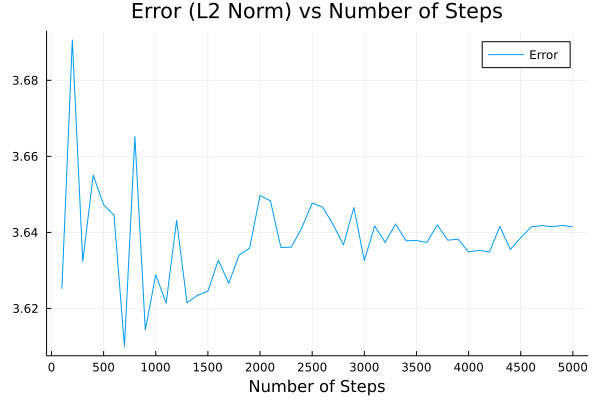

In [6]:
plot(resolutions, scaled_L2, label="Error", title="Error (L2 Norm) vs Number of Steps", xlabel="Number of Steps", xticks=0:500:5000)